# Real Estate Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

Load the data into a dataframe

In [2]:
data = pd.read_csv('data_folder/kc_house_data.csv', index_col = 0)
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [3]:
data.shape

(21597, 20)

Count the null values

In [4]:
data.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Fill the null values with yr_renovated with 0 meaning it was not renovated.

In [5]:
data['yr_renovated'] = data["yr_renovated"].fillna(0)

Drop what are essentially null values from sqft_basement losing less than 2% of the data.

In [6]:
data = data[~data['sqft_basement'].isin(['?'])]
data.shape

(21143, 20)

Round bathrooms to the nearest half-bath

In [7]:
data['bathrooms']=round(data['bathrooms']*2)/2

<ipython-input-7-67c3fce2bafa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bathrooms']=round(data['bathrooms']*2)/2


In [8]:
data['bathrooms'].value_counts()

2.0    6891
2.5    5255
1.0    3837
3.0    2470
1.5    1422
3.5     719
4.0     366
4.5      96
5.0      55
6.0      12
5.5       9
8.0       3
0.5       3
6.5       2
7.0       2
7.5       1
Name: bathrooms, dtype: int64

Convert 'sqft_basement' into a float type in order to create a new variable 'has_basement'

In [9]:
data['sqft_basement'].astype(float, copy=False)

id
7129300520      0.0
6414100192    400.0
5631500400      0.0
2487200875    910.0
1954400510      0.0
              ...  
263000018       0.0
6600060120      0.0
1523300141      0.0
291310100       0.0
1523300157      0.0
Name: sqft_basement, Length: 21143, dtype: float64

In [10]:
data['has_basement']= np.where(data['sqft_basement']!= 0, True, False)

<ipython-input-10-1df61e2bf4a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_basement']= np.where(data['sqft_basement']!= 0, True, False)


Create a new variable called 'is_renovated' 

In [11]:
data['is_renovated']= np.where(data['yr_renovated']!= 0, True, False)

<ipython-input-11-534eb58d893c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_renovated']= np.where(data['yr_renovated']!= 0, True, False)


We are interested to see if seasonality will play a role in the housing price. Change the date to a datetime column, isolate the month, and code for each season.

In [12]:
data['date'] = pd.to_datetime(data['date'])
data['month']= data['date'].dt.month
data = data.assign(season=lambda x: x["date"].apply(lambda s: ["winter","spring","summer","fall"][(s.month-1)//3]))

<ipython-input-12-b9c90b28d6e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
<ipython-input-12-b9c90b28d6e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month']= data['date'].dt.month


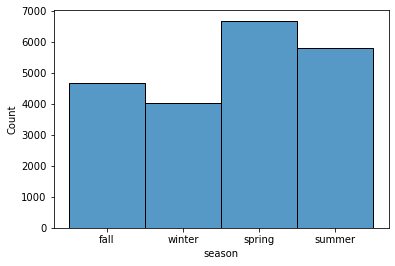

In [13]:
sns.histplot(data=data['season']);

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 7129300520 to 1523300157
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21143 non-null  datetime64[ns]
 1   price          21143 non-null  float64       
 2   bedrooms       21143 non-null  int64         
 3   bathrooms      21143 non-null  float64       
 4   sqft_living    21143 non-null  int64         
 5   sqft_lot       21143 non-null  int64         
 6   floors         21143 non-null  float64       
 7   waterfront     18804 non-null  float64       
 8   view           21082 non-null  float64       
 9   condition      21143 non-null  int64         
 10  grade          21143 non-null  int64         
 11  sqft_above     21143 non-null  int64         
 12  sqft_basement  21143 non-null  object        
 13  yr_built       21143 non-null  int64         
 14  yr_renovated   21143 non-null  float64       
 15  zipco

Drop variables that will not be apart of the model.

In [15]:
data.drop(['waterfront','view', 'sqft_above', 'zipcode','month', 'yr_renovated','sqft_basement'], axis=1, inplace=True)

In [16]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'has_basement', 'is_renovated',
       'season'],
      dtype='object')

Create a scatterplot for each variable in relationship to price to investigate whether variable are categorical.

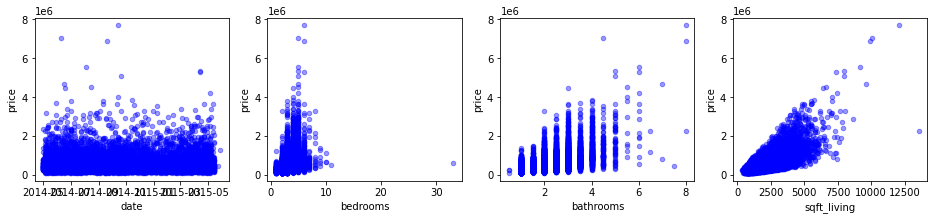

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['date', 'bedrooms', 'bathrooms', 'sqft_living'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

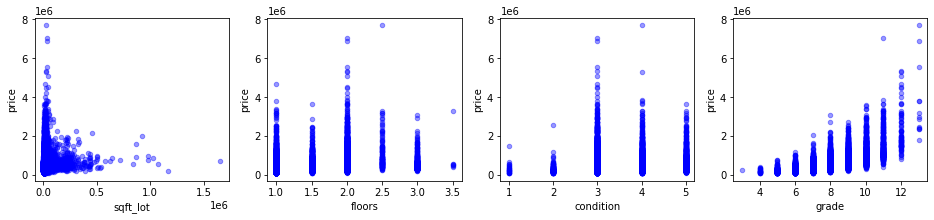

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_lot', 'floors', 'condition', 'grade'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

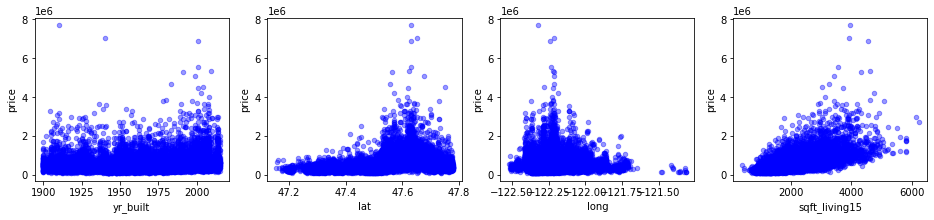

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['yr_built', 'lat', 'long', 'sqft_living15'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

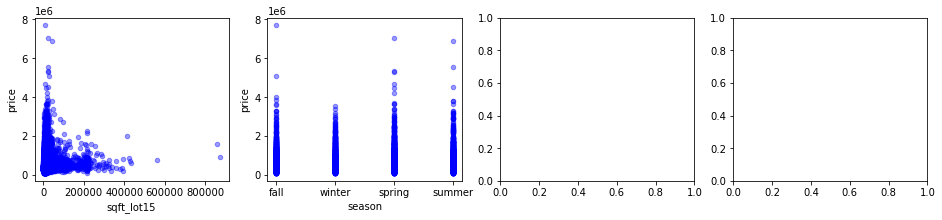

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_lot15','season'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [21]:
#pd.plotting.scatter_matrix(data,figsize  = [20, 20]);
#plt.show()

Create list of discrete variables

In [22]:
discrete_features = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'is_renovated','has_basement', 'season']

Plot a bar graph for each discrete variable.

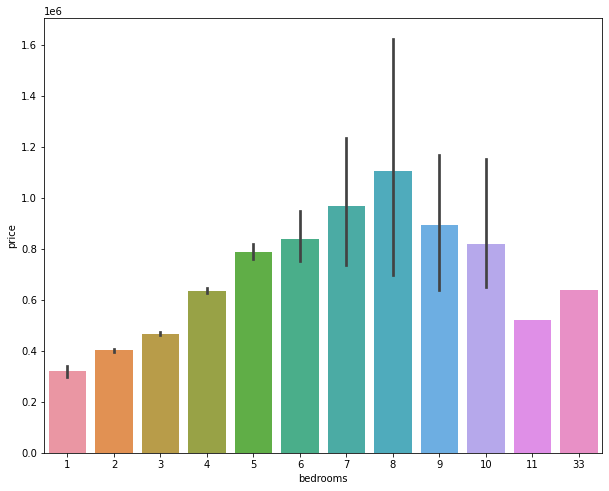

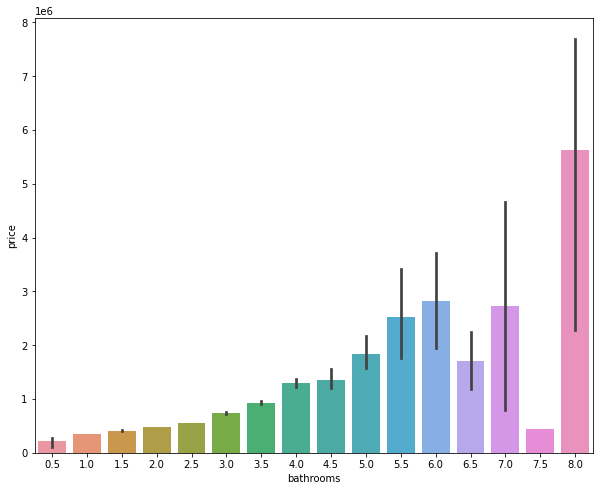

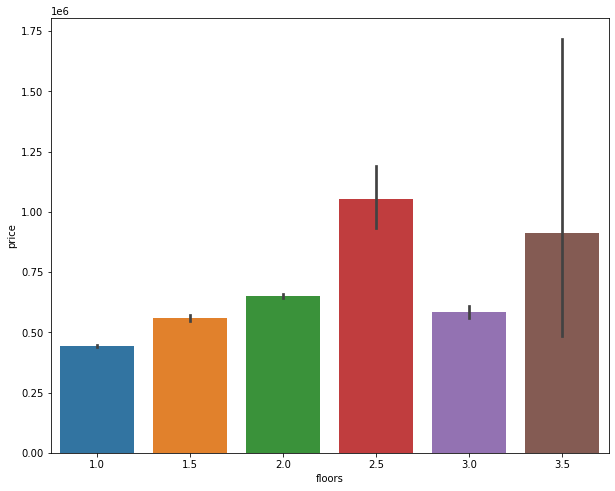

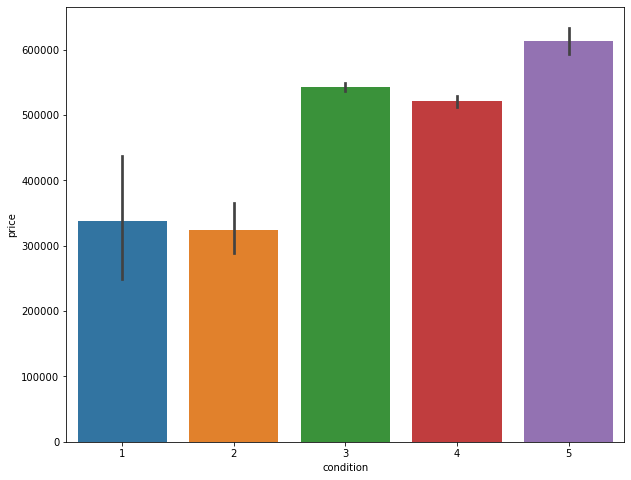

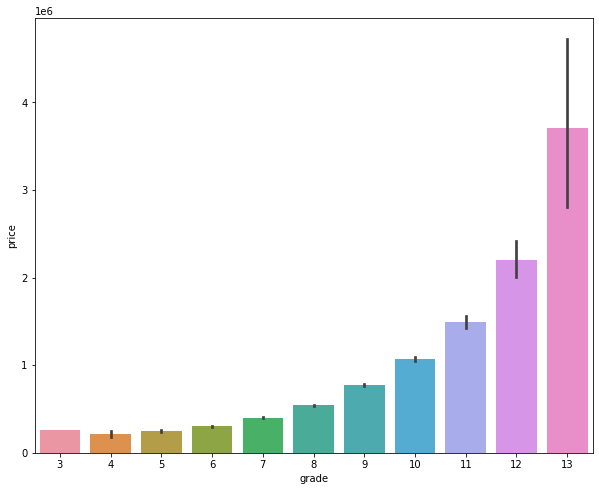

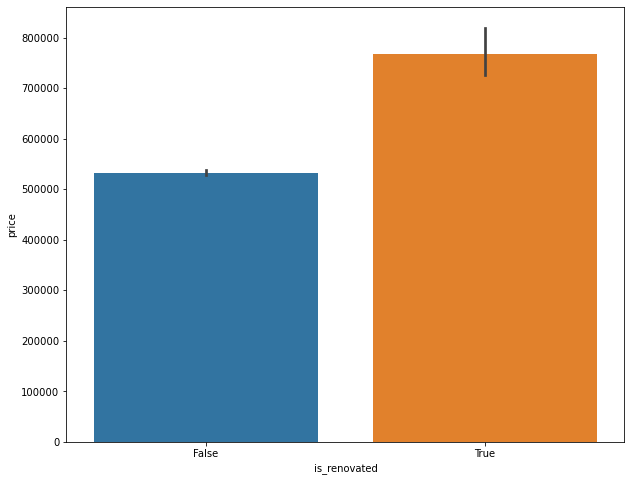

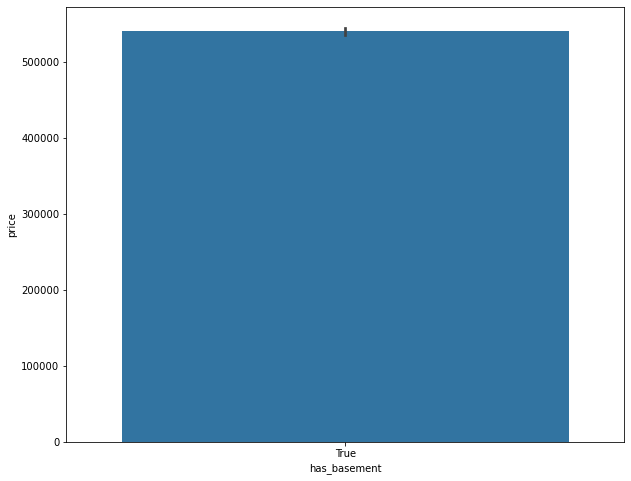

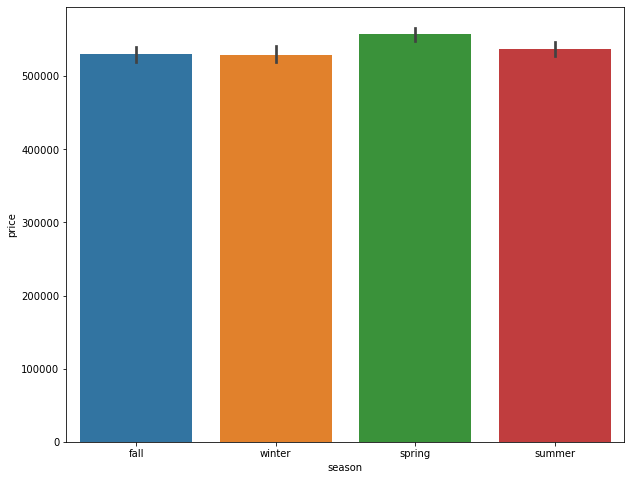

In [23]:
for feature in discrete_features:
    plt.figure(figsize=(10,8))
    sns.barplot(x=feature, y='price', data=data)
    

Create a list of the continuous variables.

In [24]:
continuous_features = [feature for feature in data.columns if feature not in discrete_features+['price']+['date']]
continuous_features

['sqft_living',
 'sqft_lot',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

Plot the distribution for each of the continuous variables

<Figure size 432x288 with 0 Axes>

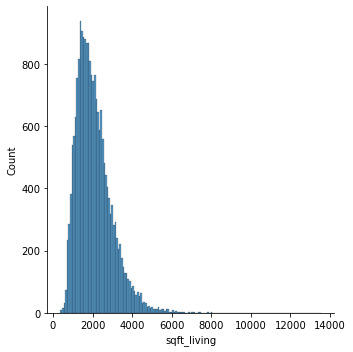

<Figure size 432x288 with 0 Axes>

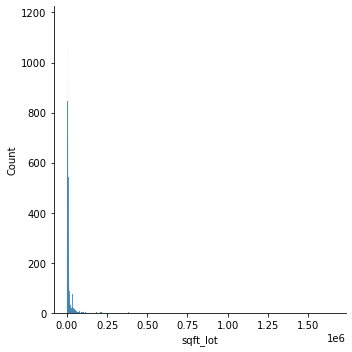

<Figure size 432x288 with 0 Axes>

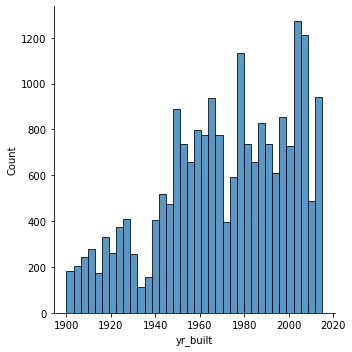

<Figure size 432x288 with 0 Axes>

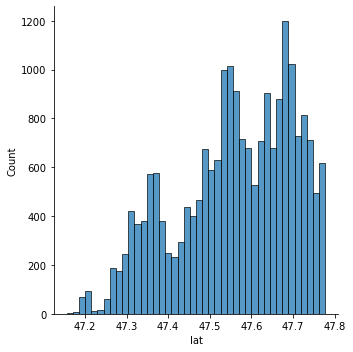

<Figure size 432x288 with 0 Axes>

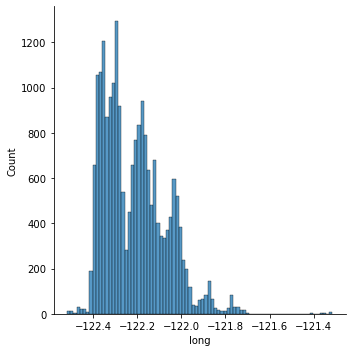

<Figure size 432x288 with 0 Axes>

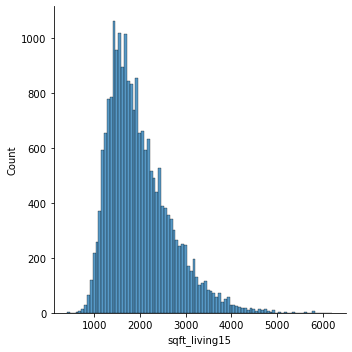

<Figure size 432x288 with 0 Axes>

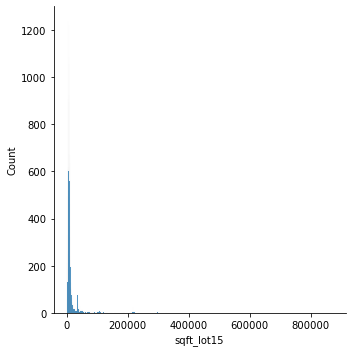

In [25]:
for feature in continuous_features:
    plt.figure()
    sns.displot(data[feature])

Dealing with Outliers

In [26]:
def lower_limit(col):
    lower_limit = np.mean(col)-3*np.std(col)
    return lower_limit

In [27]:
def upper_limit(col):
    upper_limit = np.mean(col)+3*np.std(col)
    return upper_limit

Removing outliers from continuous variables

In [28]:
data = data[(data['sqft_living'] >= lower_limit(data['sqft_living'])) & (data['sqft_living'] <= upper_limit(data['sqft_living']))]

In [29]:
data = data[(data['sqft_lot'] >= lower_limit(data['sqft_lot'])) & (data['sqft_lot'] <= upper_limit(data['sqft_lot']))]

In [30]:
data = data[(data['sqft_living15'] >= lower_limit(data['sqft_living15'])) & (data['sqft_living15'] <= upper_limit(data['sqft_living15']))]

In [31]:
data = data[(data['sqft_lot15'] >= lower_limit(data['sqft_lot15'])) & (data['sqft_lot15'] <= upper_limit(data['sqft_lot15']))]

In [32]:
data.shape

(20132, 17)

Remove outlier from bedroom data (33 bedrooms with 1620 sqft of living space)

In [33]:
data['bedrooms'].max()

33

In [34]:
data[(data['bedrooms']==33)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,lat,long,sqft_living15,sqft_lot15,has_basement,is_renovated,season
id,,,,,,,,,,,,,,,,,
2402100895,2014-06-25,640000.0,33,2.0,1620,6000,1.0,5,7,1947,47.6878,-122.331,1330,4700,True,False,spring


In [35]:
data = data[(data['bedrooms']!=33)]

Look at the distribution for the continuous variables after removing outliers.

<Figure size 432x288 with 0 Axes>

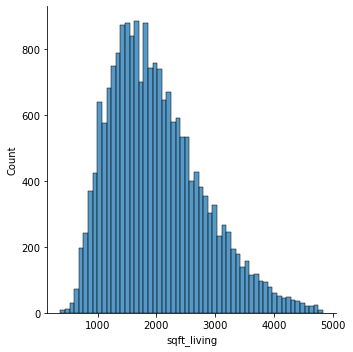

<Figure size 432x288 with 0 Axes>

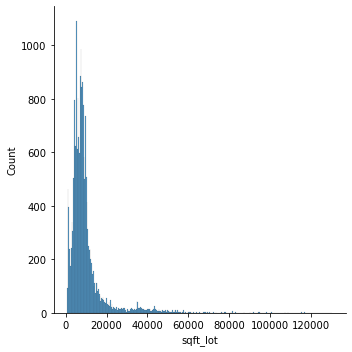

<Figure size 432x288 with 0 Axes>

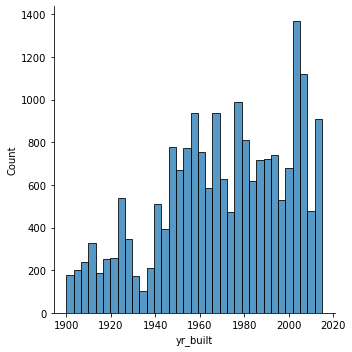

<Figure size 432x288 with 0 Axes>

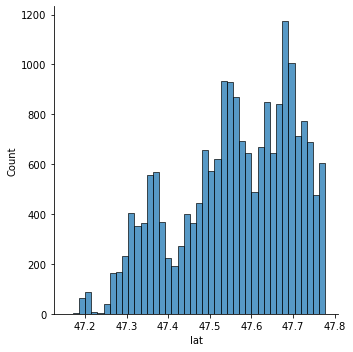

<Figure size 432x288 with 0 Axes>

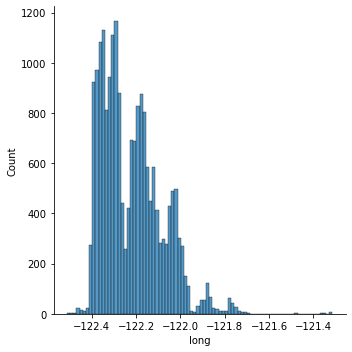

<Figure size 432x288 with 0 Axes>

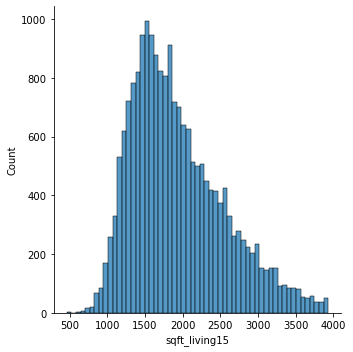

<Figure size 432x288 with 0 Axes>

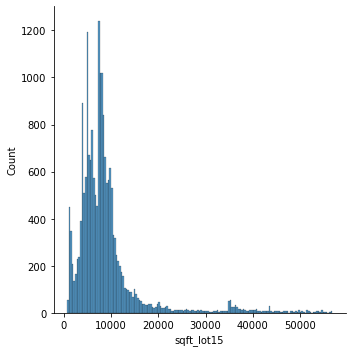

In [36]:
for feature in continuous_features:
    plt.figure()
    sns.displot(data[feature])

Look at the correlations of each columns with price.

In [37]:
price_corrs = data.corr()["price"].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
sqft_living      0.646800
grade            0.643538
sqft_living15    0.559596
bathrooms        0.460189
lat              0.363181
bedrooms         0.294626
floors           0.252868
is_renovated     0.126962
sqft_lot15       0.121899
sqft_lot         0.114814
condition        0.057957
yr_built         0.022790
long             0.003159
has_basement          NaN
Name: price, dtype: float64

Create a heat map to identify correlation between variables to look for issues with multicollinearity.

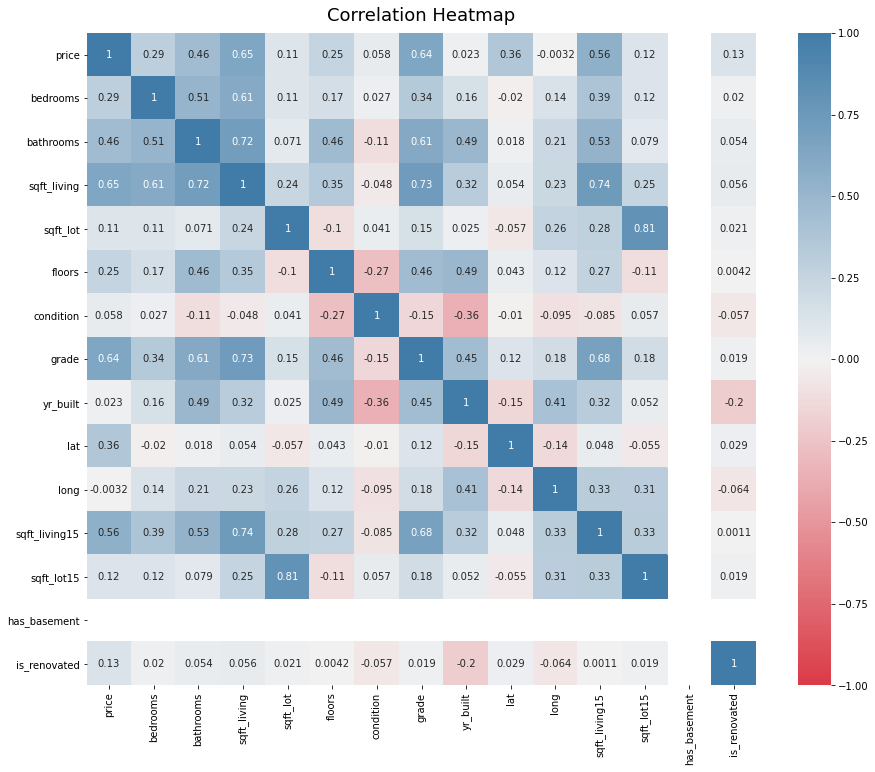

In [38]:
cmap = sns.diverging_palette(10, 240, as_cmap=True)
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

Drop the sqft_living15 and sqft_lot15 as they are highly correlated with sqft_living and sqft_lot. 

In [39]:
data.drop(labels = ['sqft_living15','sqft_lot15'], axis=1, inplace=True)

__Create dummy variables__

__Standarize variables__

__Train-Test Split__

In [40]:
y = data['price']
X = data.drop(['price'], axis=1)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16104 4027 16104 4027


Playing with latitude and longitude graphing

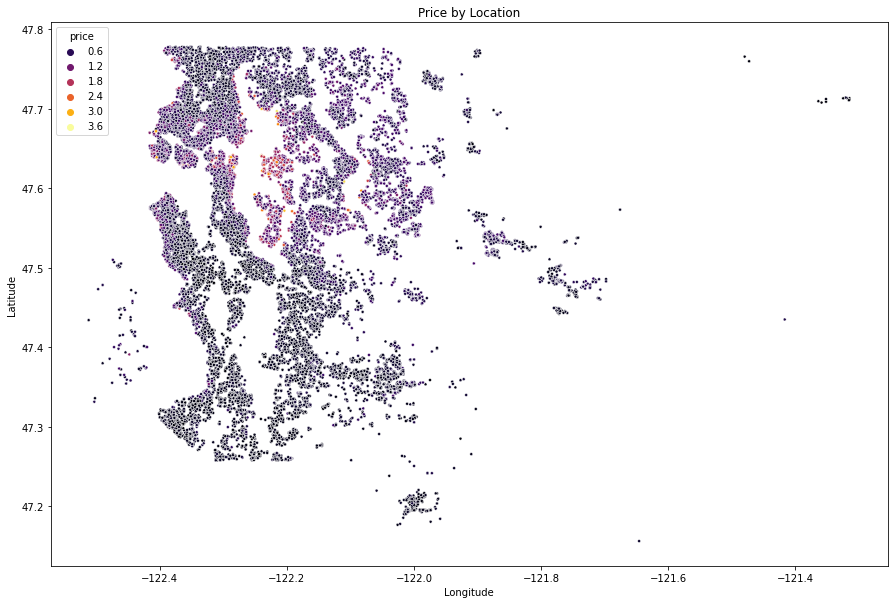

In [43]:
fig = plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=data["long"], y=data["lat"], hue=data['price'], palette="inferno",
                     marker=".")
ax.set( xlabel="Longitude",
        ylabel="Latitude", 
        title="Price by Location");